IMPORTATION PANDAS POUR LIRE LE CSV ET LECTURE DU CSV

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/home/leguibs/Brief_commentaire/csv/annuaire_cine_brief.csv")
data.head()

,Note,Commentaire
0,"2,5","Scream 3 n’est pas le meilleur de la saga, je ..."
1,"2,5",'' Scream 3 '' troisième volet de la quadrilog...
2,"5,0","Pour moi, la trilogie se clot en beauté. Même ..."
3,"4,0","A force de parodier des parodies, on ne sait p..."
4,"2,5",Après un second volet très correct mais néanmo...


VERIFICATION DU CSV

In [10]:
data.isnull().sum()

Note           0
Commentaire    0
dtype: int64

il n'y a pas d'éléments manquants dans notre fichier

In [11]:
data.shape

(8013, 2)

dimension du data avec 8013 lignes et 2 colonnes

In [12]:
print(data.columns.tolist()) 

['Note', 'Commentaire']


Ici on observe le nom des deux colonnes

ENCODAGE DE LA COLONNE "Note"

In [13]:
data.Note = data["Note"].str.replace(",", ".")
data.Note.head()

0    2.5
1    2.5
2    5.0
3    4.0
4    2.5
Name: Note, dtype: object

On a remplace les virgules par des points

In [14]:
data.Note = pd.to_numeric(data.Note)
print(data.Note)

0       2.5
1       2.5
2       5.0
3       4.0
4       2.5
       ... 
8008    5.0
8009    5.0
8010    5.0
8011    5.0
8012    4.5
Name: Note, Length: 8013, dtype: float64


Ici on a transformé les valeurs de la colonne "Note" en valeur numéric

In [15]:
data.loc[(data.Note < 3,"Note" )]= 0
data.loc[(data.Note > 3,"Note" )]= 1

Encodage en "1" pour les commentaires jugés positifs et en "0" pour les commentaires négatifs

In [16]:
print(data.Note[:20])

0     0.0
1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    3.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
Name: Note, dtype: float64


On obtient des notes de types floats on va donc les modifier en entiers

In [17]:
data.Note = pd.to_numeric(data.Note, downcast='integer')

In [18]:
print(data.Note[:20])

0     0
1     0
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     0
10    1
11    0
12    0
13    3
14    1
15    0
16    0
17    1
18    1
19    0
Name: Note, dtype: int8


On a bien obtenu des nombres entiers ce qui est plus propre. 0 est égal à une note jugée négative, 1 est égal à une note jugée positive, et 3 est égal à une note considéré comme neutre.

IMPORTATION DE MATPLOTLIB ET SEABORN DANS LE BUT D'OBSERVER LA PROPORTION DE COMMENTAIRE POSITIF ET NEGATIF

<Figure size 640x480 with 0 Axes>

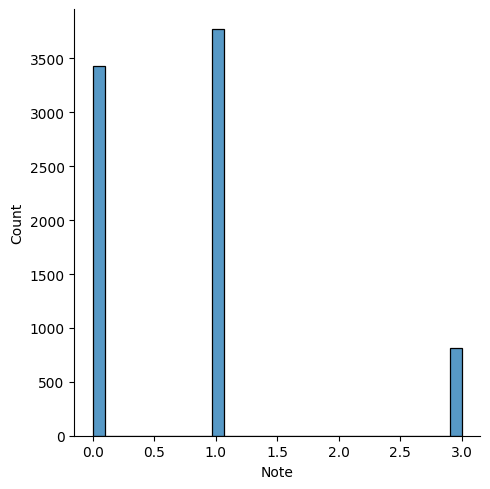

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.displot(data = data, x= data.Note)
plt.show()

Observation graphique des données.

In [20]:
data_note_egual_1 = data.Note[data.Note == 1]
data_note_egual_0 = data.Note[data.Note == 0]

Ici on a séparé les commentaires négatifs et positifs dans des variables qui leurs sont propres.

In [21]:
print("la somme des note égale à 1(positive) et de : ", data_note_egual_1.sum())
print("la somme des note égale à 0(négative) et de : ", data_note_egual_0.count())

la somme des note égale à 1(positive) et de :  3770
la somme des note égale à 0(négative) et de :  3433


Observation : 

- On voit qu'il y a plus de commentaires positives que négatives.
- Pour ne pas fausser notre jeu de données on va le rééquilibrer afin d'avoir les même proportions.
- On a donc scrapper un nouveau film pour faire de la data augmentation. (explications dans le fichier data_augmentation.ipynb) 

NOUVEAUX FICHIER CSV APRES REEQUILIBRAGE DES DONNEES

In [22]:
data_2 = pd.read_csv("/home/leguibs/Brief_commentaire/csv/result.csv")

In [23]:
data_2.Note = data_2["Note"].str.replace(",", ".")
data_2.Note.head()

0    2.5
1    2.5
2    5.0
3    4.0
4    2.5
Name: Note, dtype: object

In [24]:
data_2.Note = pd.to_numeric(data_2.Note)

In [25]:
data_2.loc[(data_2.Note < 3,"Note" )]= 0
data_2.loc[(data_2.Note > 3,"Note" )]= 1

In [26]:
data_2.Note = pd.to_numeric(data_2.Note, downcast='integer')

<Figure size 640x480 with 0 Axes>

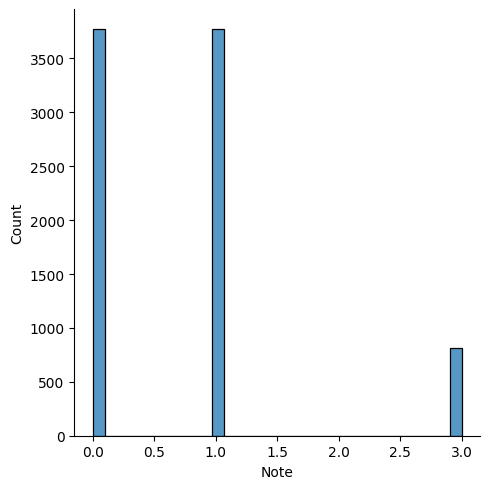

In [27]:
plt.figure()
sns.displot(data = data_2, x= data_2.Note)
plt.show()

In [28]:
data_note_egual_1 = data_2.Note[data_2.Note == 1]
data_note_egual_0 = data_2.Note[data_2.Note == 0]

In [29]:
print("la somme des note égale à 1(positive) et de : ", data_note_egual_1.count())
print("la somme des note égale à 0(négative) et de : ", data_note_egual_0.count())

la somme des note égale à 1(positive) et de :  3770
la somme des note égale à 0(négative) et de :  3770


On a maintenant un équilibre parfait entre les commentaires positifs et négatifs

SUPPRESSION DE LA VALEURS 3 AFIN DE GARDER LES VALEURS 1 ET 0

In [30]:
data_2 = data_2[data_2["Note"].isin([0, 1])]

In [31]:
data_2 = data_2.reset_index(drop=True) # reset de l'index du fichier afin de supprimer les lignes vides

On avait des Notes, dans notre data, avec une valeur de 3 correspondant aux notes égales à 3 étoiles. Comme nous voulions uniquement les notes inférieurs ou supérieurs à 3, 3 étant exclu ses notes on étaient encodées sous la valeurs 3. On ne souhaitais pas cette valeurs, on a donc utilisé la fonction isin(), pour garder uniquements commentaires notées 0 ou 1. Ce qui va nous aider pour l'apprentissage de notre model.

NETTOYAGE DES DONNEES DE LA COLONNE COMMENTAIRE

In [32]:
data_2.Commentaire = data_2["Commentaire"].str.lower()
data_2.head()

,Note,Commentaire
0,0,"scream 3 n’est pas le meilleur de la saga, je ..."
1,0,'' scream 3 '' troisième volet de la quadrilog...
2,1,"pour moi, la trilogie se clot en beauté. même ..."
3,1,"a force de parodier des parodies, on ne sait p..."
4,0,après un second volet très correct mais néanmo...


On a changé toutes les majuscules en minuscules

In [33]:
data_2.Commentaire = pd.DataFrame(data_2["Commentaire"], dtype=str)

Ici on a bien précisé que les valeurs de la colonne "Commentaire" sont d'un type str (chaine de caractères)

In [34]:
data_2.Commentaire = data_2.Commentaire.str.replace(r"http\S+", "")
data_2.Commentaire = data_2.Commentaire.str.replace(r"●  ●  ●", "")
data_2.Commentaire = data_2.Commentaire.str.replace(r"spoiler", "")
data_2.Commentaire = data_2.Commentaire.str.replace(r":", " ")
data_2.Commentaire = data_2.Commentaire.str.replace(r".", " ")
data_2.Commentaire = data_2.Commentaire.str.replace(r",", " ")

/tmp/ipykernel_2327/1673409114.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2.Commentaire = data_2.Commentaire.str.replace(r"http\S+", "")
/tmp/ipykernel_2327/1673409114.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_2.Commentaire = data_2.Commentaire.str.replace(r".", " ")


On a remplacer différent caractére spécifique

In [35]:
mot_a_remplacer = ["scream", "sidney", "windsor", "david" "arquette", "mr.craven", "courtney", "cox", "wes", "hollywood", "randy", "julia", "roberts", "bruce", "willis", "vincent", "cassel", "terry", "benedict", "ocean's", "twelve", "ocean's", "eleven", "danny", "pays-bas", "catherine", "soderbergh", "zeta-jones", "clooney", "brad", "pitt", "george", "steven", "borat", "sacha", "baron", "cohen", "larry", "kasak", "charles", "ken", "davitian", "usa", "amerique", "mickeal", "youn", "mirrors", "lloyd", "alexandre", "aja", "piranhas", "piranhas", "grand rex", "rex", "spielberg", "eli", "dubosc", "roth", "franck", "christophe", "richard", "dreyfuss", "ving rhames", "haute tension", "sprin" "break", "deadpool", "sam", "raimi", "homecoming", "spiderman", "spider-man", "marvel", "sony", "peter", "parker", "america", "civil war", "mickael", "keaton", "stark", "tony", "tom", "holland", "may", "mark", "webb", "disney", "tobey", "maguire", "giacchino", "iron man", "downey", "jr", "albert", "finney", "fox", "michael j fox", "captain america", "predator", "prey", "scharny", "harrigan", "pocahontas", "goliath", "david", "tiernan", "obi-wan", "amber", "minthunder", "robocop", "terminator", "matrix", "scwarzy", "hulu", "schwarzie", "hannibal", "ridley", "scott", "lecter", "thomas", "anthony", "hopkins", "clarence", "starling", "julianne", "moore", "demme", "mason", "verger", "gary", "oldman", "clarice", "starling", "jodie", "foster", "carwford", "woody", "allen", "barcelona", "vicky", "cristina", "rebecca", "hall", "penelope", "cruz", "cassandre", "scarlett", "johansson", "javier", "patricia", "jackson", "bardem", "penellope", "christina", "barce", "lewis", "juliette", "tommy", "lee", "jones", "quentin", "tarantino", "harrelson", "olivier", "stone", "oliver", "mallory", "mickey", "boyle", "danny"]

In [36]:
for mot in mot_a_remplacer:
    data_2.Commentaire = data_2.Commentaire.str.replace(mot, " ")

/tmp/ipykernel_2327/1716268738.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2.Commentaire = data_2.Commentaire.str.replace(mot, " ")


In [37]:
# for i in range(len(data_2.Commentaire)):
#     for mot in mot_a_remplacer:
#         data_2.Commentaire[i] = data_2.Commentaire[i].replace(mot, " ")

In [38]:
print(data_2.Commentaire[:18])

0       3 n’est pas le meilleur de la saga  je dirai...
1     ''   3 '' troisième volet de la quadrilogie ''...
2     pour moi  la trilogie se clot en beauté  même ...
3     a force de parodier des parodies  on ne sait p...
4     après un second volet très correct mais néanmo...
5     réussir trois films d'une même saga est un bea...
6       3   une excellente suite qui garde les bonne...
7     on retrouve une troisième fois toute la crétin...
8     la boucle est bouclée avec cette (ultime ?) su...
9     plus on avance dans la saga et moins il y a d'...
10    les deux premiers volets restent des petits bi...
11    probablement conscients que leur petit manège ...
12    très mauvais film autant le 1er était vraiment...
13    pour beaucoup c'est l'épisode le moins inspiré...
14      3 n’est pas le meilleur de la saga  je dirai...
15    ''   3 '' troisième volet de la quadrilogie ''...
16    pour moi  la trilogie se clot en beauté  même ...
17    a force de parodier des parodies  on ne sa

C'est pas mal mais il manque encore à supprimer pas mal de ponctuations

In [39]:
import re
for i in range(len(data_2)):
    data_2.Commentaire[i] = re.sub(r'[^\w\s](?<!\w)(?<!\d)\'|\'(?!\w)(?!\d)[^\w\s]'," ", data_2.Commentaire[i])
    data_2.Commentaire[i] = re.sub(r"\d+", " ", data_2.Commentaire[i])

/tmp/ipykernel_2327/3190492995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.Commentaire[i] = re.sub(r'[^\w\s](?<!\w)(?<!\d)\'|\'(?!\w)(?!\d)[^\w\s]'," ", data_2.Commentaire[i])
/tmp/ipykernel_2327/3190492995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.Commentaire[i] = re.sub(r"\d+", " ", data_2.Commentaire[i])


- Grace au modul regex on a supprimé les chiffres ainsi que toutes les ponctuations restante par un espace pour éviter, lors de la suppression de la ponctuation, que les mots se collent entre eux. 
- On a conservé les apostrophes qui reliées les mots par des abréviations, car on les supprimeras via les "french" stopwords.

In [40]:
print(data_2.Commentaire[18])

après un second volet très correct mais néanmoins décevant comparé à l'original      est encore un cran en-dessous  le filon n'ai cependant pas complètement épuisé puisque le gosthface mask produit encore son effet dès qu'il est à l'écran  malgré une énergie positive d'une mise en scène qui ne manque pas de punch  ce troisième volet n'a pas grand chose à offrir meme dans les scènes de meurtres qui sont beaucoup moins  sanglantes  et éllaborées que dans les deux précédents opus  le jeu d'acteurs et quant à lui au plus bas  seule neve campbell est véritablement ecellente dans son role  les autres surjoue où sont niais  parfois complètement à coté de la plaque  il y a tout de meme de très bons moments de suspense et quelques passages un brun flippant comme la scène où la mère de sydney est recouverte d'un drap plein de sang que je trouve bien trouvée  l'affrontement final entre sydney et le tueur est impressionnant 


On a des doubles espaces voir triples espaces

In [41]:
data_2["Commentaire"] = data_2["Commentaire"].str.replace(r" +", " ")

/tmp/ipykernel_2327/1881055872.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2["Commentaire"] = data_2["Commentaire"].str.replace(r" +", " ")


- Ici comme la ligne de code plus haut nous a supprimer la ponctuation par des certains certains espaces sont doublé voir plus. 
- On supprime donc tout ce qui a plus de 1 espace par 1 espace simple. 

In [42]:
print(data_2.Commentaire[:18])

0      n’est pas le meilleur de la saga je dirai mêm...
1      troisième volet de la quadrilogie quelques an...
2     pour moi la trilogie se clot en beauté même si...
3     a force de parodier des parodies on ne sait pl...
4     après un second volet très correct mais néanmo...
5     réussir trois films d'une même saga est un bea...
6      une excellente suite qui garde les bonnes vie...
7     on retrouve une troisième fois toute la crétin...
8     la boucle est bouclée avec cette (ultime ?) su...
9     plus on avance dans la saga et moins il y a d'...
10    les deux premiers volets restent des petits bi...
11    probablement conscients que leur petit manège ...
12    très mauvais film autant le er était vraiment ...
13    pour beaucoup c'est l'épisode le moins inspiré...
14     n’est pas le meilleur de la saga je dirai mêm...
15     troisième volet de la quadrilogie quelques an...
16    pour moi la trilogie se clot en beauté même si...
17    a force de parodier des parodies on ne sai

TOKENISATION, STEMMINIZATION, LEMMATISATION, SUPPRESSION DES STOPWORDS

In [43]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lm= WordNetLemmatizer()

[nltk_data] Downloading package punkt to /home/leguibs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/leguibs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
print(stopwords.words("french"))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [45]:
corpus = []
for i in range(0, len(data_2)):
    words = nltk.word_tokenize(str(data_2.Commentaire[i]))
    words = [word for word in words if word.isalnum()]
    WordSet = []
    for word in words:
        if word not in set (stopwords.words("french")):
            WordSet.append(word)
    # WordSetStem = []
    # for word in WordSet:
    #     WordSetStem.append(ps.stem(word))
    WordSetLem = []
    for word in WordSet:
        word = WordSetLem.append(lm.lemmatize(word))
    message = ' '.join(WordSetLem)
    corpus.append(message)


- Ici on a récupéré chaques commentaires et on a tokenizer mot à mot tout les commentaires. Puis pour tout les mots on a supprimé les stopwords ( mots inutiles pour l'apprentissage de notre IA ), appliquer une lemmatization (récupérer l'infinitif) qu'on a enregistrer sous forme de message et enregistré dans un corpus.
- J'ai quand même gardé en commentaire l'exemple pour la stemminization

In [46]:
print(corpus[:18])

['meilleur saga dirai plus faible vois trois cause majeures côté veut faire clairement trop ici multiple mi abîmes style slasher évi nt invite vraiment renouvellement puis manque horreur vraiment consensuel effet assez consensuel meurtres peu graphiques tueur apparaît ailleurs assez peu surtout première partie étonne voir meilleure attaque celle ouverture peut non plus cacher film peine renouveler côté déroulé si suspens tient encore route jusqu révélation finale film avance code alternance peu moins bien maitrisé ici autres épisodes saga enfin trop vouloir mettre références trop vouloir jouer clichés craven finit forcer trait final improbable résulte film assez inégal après sauve peu près meubles tout acteurs surtout anciens toujours agréables arrive quelques bons petits nouveaux comme lance henriksen patrick dempsey avant célébrité a quelques guest sympathiques comme carrie fisher amuse ensemble ambiance bon enfant courteney piquante comme faut neve campbell joue sobriété sied rôle a

On peut observer maintenant que notre corpus est plutot clean.

VECTORISATION DU CORPUS

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
Y = data_2["Note"]

Notre IA a besoin de valeurs numériques pour faire ses prédictions on à donc converti chaque mot en nombre. 

ENTRAINEMENT DU MODEL

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

Ici le jeu de donnée à était séparé en 80% pour l'entraiment et 20% pour le test 

In [49]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

On a choisi le model lightgbm qui nous permet de classifier et de faire des prédictions sur le caractére positif ou négatif d'un commentaire.

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       380
           1       0.81      0.85      0.83       374

    accuracy                           0.83       754
   macro avg       0.83      0.83      0.83       754
weighted avg       0.83      0.83      0.83       754

Accuracy of LightGBM Model: 82.62599469496021 %


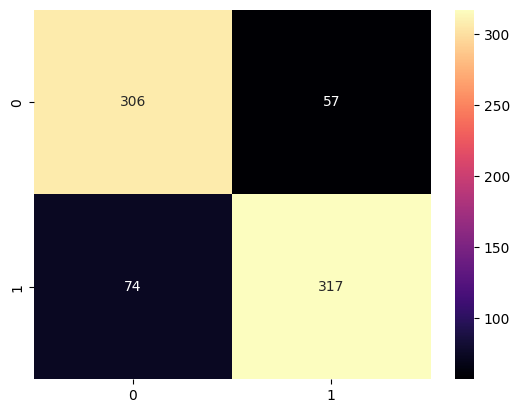

In [50]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap = "magma", fmt="d")
print("Accuracy of LightGBM Model:", acc*100,"%")



Ici on affiche la matrice de confusion ainsi que le score obtenu par le model LGBM Classifier et Le f1 score qui est la moyenne entre la colonne précision et recall de notre tableau. On obtient un score de 82,65 % d'accuracy

WORDCLOUD TOUT LES AVIS, AVIS NEGATIFS, AVIS POSITIFS

In [51]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np


In [93]:
# Charger l'image PNG
mask_nuage = np.array(Image.open("/home/leguibs/Brief_commentaire/images/1_nuage.jpg"))
mask_positif = np.array(Image.open("/home/leguibs/Brief_commentaire/images/pouce_vert.jpg"))
mask_negatif = np.array(Image.open("/home/leguibs/Brief_commentaire/images/pouce_rouge.jpg"))

# Définir les mots à exclure du nuage de mots
stopwordss = set(STOPWORDS)

# Ajouter les stopwords en français
stopwordss.update(["c'est",'au','entre','autant','autre','parfoi','cela','quand','chose','jamai','enfin','sans','alor','très','puis','cette','plu','car','toujour','dont','non','après','avant','quoi','faut','ici','toute','déjà','peut','faire','surtout','aussi','quelque','bref','tou','tout','encore','tous','assez','comme','juste','donc', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait', 'aurions', 'auriez', 'auraient', 'avais', 'avait', 'avions', 'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie', 'aies', 'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût', 'eussions', 'eussiez', 'eussent'])

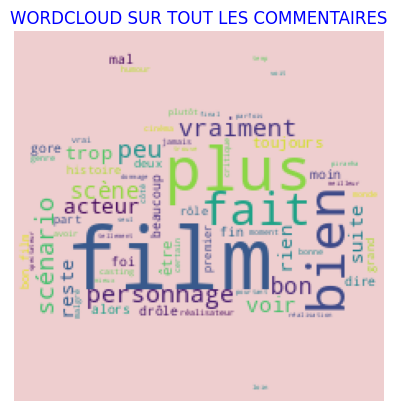

In [94]:
wordcloud_all = WordCloud(background_color = (238, 206, 207), max_words = 100,min_word_length=3, stopwords=stopwordss, mask=mask_nuage).generate(" ".join(corpus)+" ")
plt.imshow(wordcloud_all)
plt.title(label="Wordcloud sur tout les commentaires".upper(), color = "blue")
plt.axis("off")
plt.savefig("/home/leguibs/exo_cine/images/nuage_all_words.png")
plt.show()


In [54]:
data_commentaire_1 = data.Commentaire[data.Note == 1]
data_commentaire_0 = data.Commentaire[data.Note == 0]

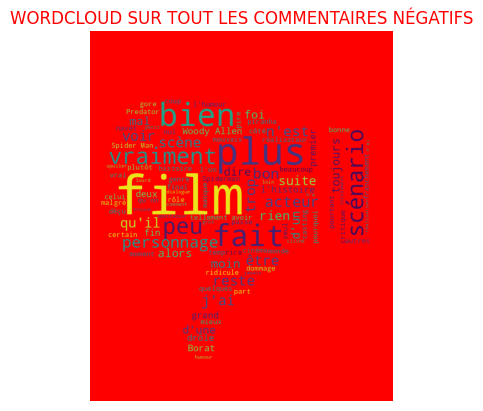

In [85]:
wordcloud_all = WordCloud(background_color = ("red"), max_words = 100, min_word_length=3, stopwords=stopwordss, mask=mask_negatif).generate(" ".join(data_commentaire_0)+" ")
plt.imshow(wordcloud_all)
plt.title(label="Wordcloud sur tout les commentaires négatifs".upper(), color = "red")
plt.axis("off")
plt.savefig("/home/leguibs/exo_cine/images/negativ_words.png")
plt.show()

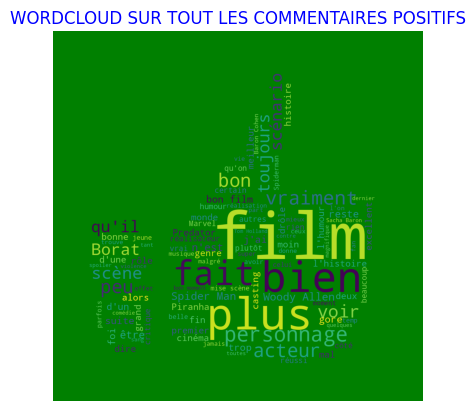

In [86]:
wordcloud_all = WordCloud(background_color = ("green"), max_words = 100,min_word_length=3, stopwords=stopwordss, mask=mask_positif).generate(" ".join(data_commentaire_1)+" ")
plt.imshow(wordcloud_all)
plt.title(label="Wordcloud sur tout les commentaires positifs".upper(), color = "blue")
plt.axis("off")
plt.savefig("/home/leguibs/exo_cine/images/positiv_words.png")
plt.show()

EXPORTATION DU MODEL AVEC JOBLIB

In [57]:
import joblib

In [58]:
model_joblib = {"Xtrain": X_train,
                "ytrain": y_train,
                "vectorizer": vectorizer,
                "classifier": classifier,
                }
joblib.dump(model_joblib, "Brief_NLP_joblib_model.joblib")

['Brief_NLP_joblib_model.joblib']